# Possíveis insights a partir dos dados de consumo explorados

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

pd.set_option('display.float_format', lambda x: '%0f' % x)
sns.set_style("darkgrid")


df_energy_insights = pd.read_csv('../datasets/processed/energy_by_region.csv')
df_energy_insights.head()

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,data,dataStr
0,2004,1,Outros,40857,69617.000000,RN,Rio Grande do Norte,Nordeste,Brasil,2004-01-01,January/2004
1,2004,1,Outros,311650,937538.000000,SP,Sao Paulo,Sudeste,Brasil,2004-01-01,January/2004
2,2004,1,Outros,56881,67601.000000,MS,Mato Grosso do Sul,Centro-Oeste,Brasil,2004-01-01,January/2004
3,2004,1,Outros,226165,209380.000000,SC,Santa Catarina,Sul,Brasil,2004-01-01,January/2004
4,2004,1,Outros,70634,416128.000000,RJ,Rio de Janeiro,Sudeste,Brasil,2004-01-01,January/2004


In [136]:
df_energy_insights.describe()

,ano,mes,numero_consumidores,consumo
count,25920.000000,25920.000000,25920.000000,25920.000000
mean,2013.500000,6.500000,682303.377199,339170.896721
std,5.766393,3.452119,1839311.687366,603642.745612
min,2004.000000,1.000000,52.000000,354.000000
25%,2008.750000,3.750000,18956.500000,61545.500000
50%,2013.500000,6.500000,108174.500000,136754.500000
75%,2018.250000,9.250000,442412.000000,361651.750000
max,2023.000000,12.000000,19201264.000000,4849895.000000


In [137]:
df_energy_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  25920 non-null  int64  
 1   mes                  25920 non-null  int64  
 2   tipo_consumo         25920 non-null  object 
 3   numero_consumidores  25920 non-null  int64  
 4   consumo              25920 non-null  float64
 5   sigla                25920 non-null  object 
 6   estado               25920 non-null  object 
 7   regiao               25920 non-null  object 
 8   pais                 25920 non-null  object 
 9   data                 25920 non-null  object 
 10  dataStr              25920 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.2+ MB


In [138]:
df_energy_insights['data'] = pd.to_datetime(df_energy_insights['data'])
df_energy_insights.head()

,ano,mes,tipo_consumo,numero_consumidores,consumo,sigla,estado,regiao,pais,data,dataStr
0,2004,1,Outros,40857,69617.000000,RN,Rio Grande do Norte,Nordeste,Brasil,2004-01-01,January/2004
1,2004,1,Outros,311650,937538.000000,SP,Sao Paulo,Sudeste,Brasil,2004-01-01,January/2004
2,2004,1,Outros,56881,67601.000000,MS,Mato Grosso do Sul,Centro-Oeste,Brasil,2004-01-01,January/2004
3,2004,1,Outros,226165,209380.000000,SC,Santa Catarina,Sul,Brasil,2004-01-01,January/2004
4,2004,1,Outros,70634,416128.000000,RJ,Rio de Janeiro,Sudeste,Brasil,2004-01-01,January/2004


1. Média de consumo elétrico para o estado de Minas Gerais para o tipo  de consumo residencial entre todos os anos: 

In [139]:
mg_filter = ((df_energy_insights['sigla'] == 'MG') & (df_energy_insights['tipo_consumo'] == 'Residencial'))
average = df_energy_insights[mg_filter]['consumo'].mean()
print(f'A média mensal de consumo residencial em Minas Gerais entre os anos de 2004 e 2023 é de {average:.2f}')

A média mensal de consumo residencial em Minas Gerais entre os anos de 2004 e 2023 é de 824152.16


2. O estado que apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019: 

In [140]:
industrial_2019_filter = ((df_energy_insights['ano'] == 2019) & (df_energy_insights['tipo_consumo'] == 'Industrial'))
industrial_2019_data = df_energy_insights[industrial_2019_filter][['sigla', 'consumo']].groupby('sigla')['consumo'].sum().sort_values()


<Axes: title={'center': 'Consumo Industrial em 2019'}, xlabel='sigla', ylabel='consumo'>

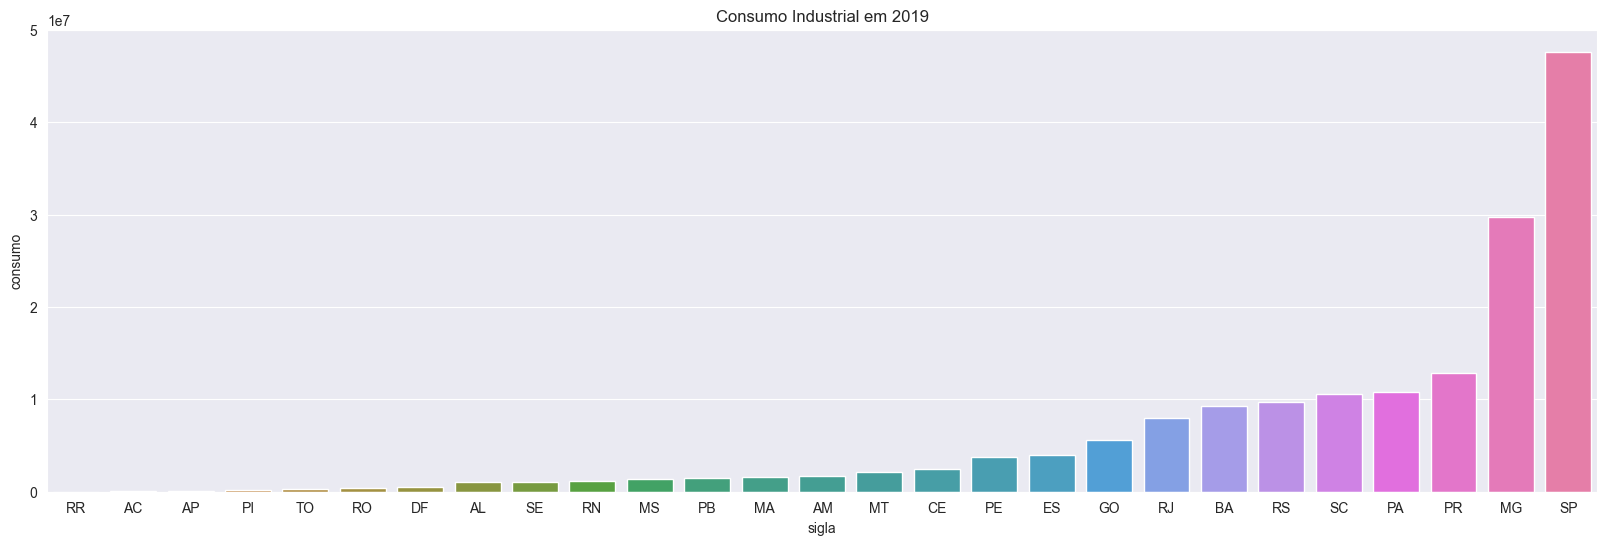

In [141]:
import src.utils_graphic as util
plt.figure(figsize=(20,6))
plt.title('Consumo Industrial em 2019')
plt.grid(True)
sns.barplot(data=industrial_2019_data.to_frame(), x='sigla', y='consumo', hue='sigla')


Com base na interpretação do grafico gerado é possível concluir que o estado que apresentou o maior consumo de energia elétrica no setor Industrial no ano de 2019 é São Paulo

3. Criação de um gráfico de barras exibindo as médias de consumo residencial e destacando os cinco estados com maiores médias:

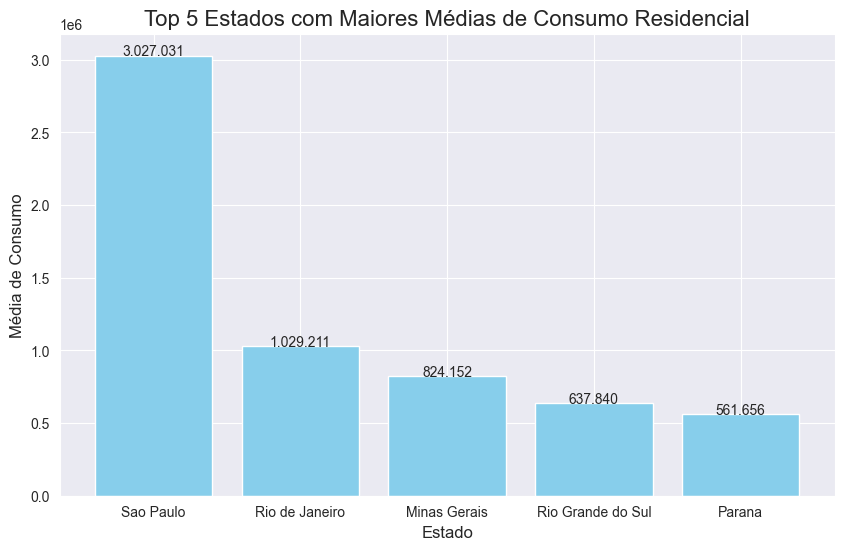

In [142]:
df_residencial = df_energy_insights[df_energy_insights['tipo_consumo'] == 'Residencial']
mean_by_region = (df_residencial.groupby('estado')['consumo'].mean().reset_index())
top5_region = mean_by_region.sort_values(by='consumo', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top5_region['estado'], top5_region['consumo'], color='skyblue')

plt.title('Top 5 Estados com Maiores Médias de Consumo Residencial', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Média de Consumo', fontsize=12)

for i, v in enumerate(top5_region['consumo']):
    plt.text(i, v + 0.05, f'{v:,.0f}'.replace(',','.'), ha='center', fontsize=10)


plt.show()

4. Criação de um gráfico de barras exibindo a soma do consumo de energia, agrupado por tipo de consumo existente na base de dados, para o estado de São Paulo.

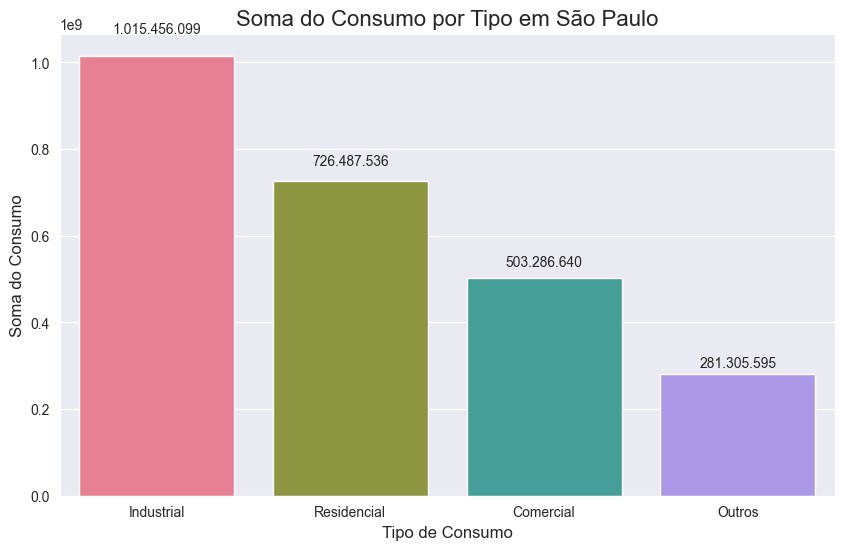

In [143]:
df_sp = df_energy_insights[df_energy_insights['estado'] == 'Sao Paulo']

sum_by_type = (df_sp.groupby('tipo_consumo')['consumo'].sum().reset_index())
sum_by_type = sum_by_type.sort_values(by='consumo', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sum_by_type, x='tipo_consumo', y='consumo', palette='husl', hue='tipo_consumo', legend=False)

plt.title('Soma do Consumo por Tipo em São Paulo', fontsize=16)
plt.xlabel('Tipo de Consumo', fontsize=12)
plt.ylabel('Soma do Consumo', fontsize=12)

for i, v in enumerate(sum_by_type['consumo']):
    plt.text(i, v + 0.05 * v, f'{v:,.0f}'.replace(',','.'), ha='center', fontsize=10)

plt.show()

5. Qual ano que obteve o maior consumo?

In [144]:
energy_by_year = df_energy_insights.groupby(['ano']).agg(
    consumo = ('consumo', 'sum')
).reset_index()

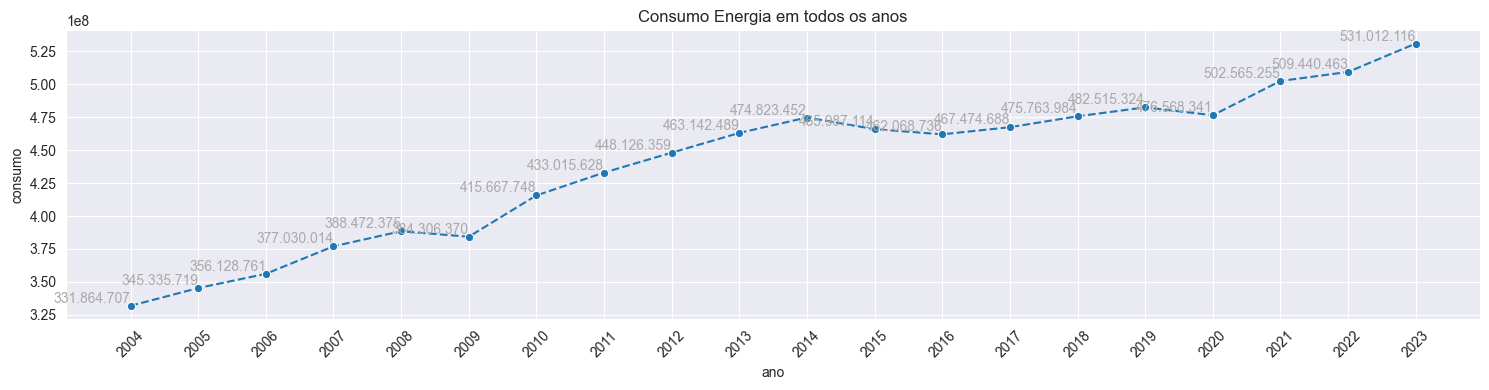

In [145]:
plt.figure(figsize=(15,4))
plt.title('Consumo Energia em todos os anos')
plt.xticks(ticks=energy_by_year['ano'], rotation=45)

axLine = sns.lineplot(data=energy_by_year, x='ano', y='consumo', marker='o', linestyle='--')
util.add_mark_to_line(ax=axLine, color='#AAA')

plt.tight_layout()
plt.show()

De acordo com grafico acima que mostra o consumo de energia ao longo dos anos, o ano com maior consumo é o ano de 2023 com 531.012.116 de consumo

6. Qual foi o estado que obteve menor consumo no ano de 2020?

In [146]:
energy_use_2020_filter = ((df_energy_insights['ano'] == 2020))
energy_use_2020_data = df_energy_insights[energy_use_2020_filter][['estado', 'consumo']].groupby('estado')['consumo'].sum().sort_values()


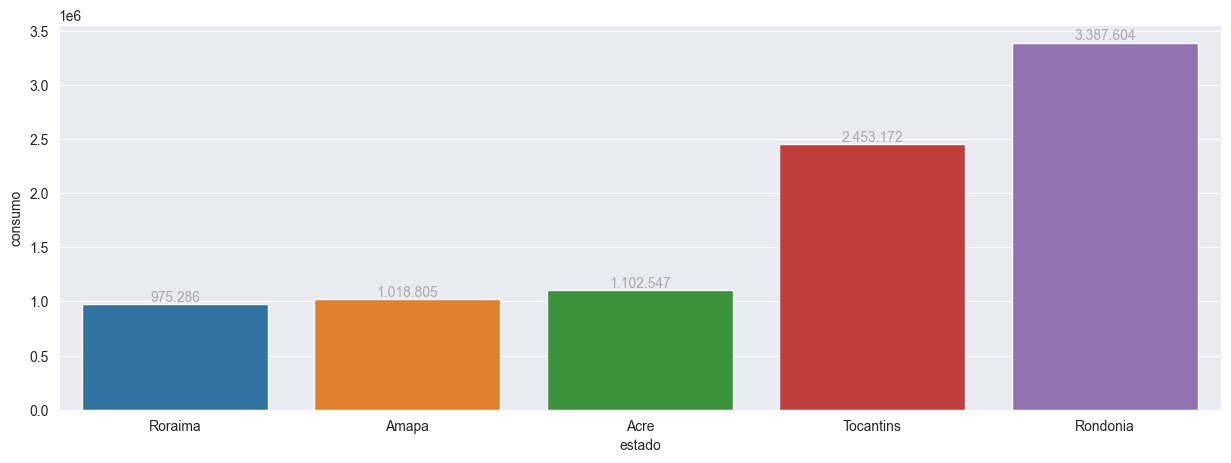

In [147]:
plt.figure(figsize=(15,5))
axBar = sns.barplot(data=energy_use_2020_data[:5].to_frame(), x='estado', y='consumo', hue='estado')
util.add_mark_to_bar(axBar, '#AAA')
plt.show()

De acordo com o gráfico acima, que exibe os cinco estados com o menor consumo de energia no Brasil em 2020, o estado de Roraima apresentou o menor consumo entre todos

7. Calcule a amplitude dos dados de consumo de energia elétrica para
o ano de 2019.

In [148]:
dados_2019 = df_energy_insights[df_energy_insights['ano']== 2019]
amplitude_consumo = dados_2019['consumo'].max() - dados_2019['consumo'].min()
print(f"A amplitude do consumo de energia elétrica em 2019 é :  {amplitude_consumo}") 


A amplitude do consumo de energia elétrica em 2019 é :  4136720.0


8. Qual é a média do consumo residencial de todos os consumidores da região nordeste no ano de 2019? 

In [149]:
energy_nordeste_2019_residencial = df_energy_insights[(df_energy_insights['ano'] == 2019)&
                                                      (df_energy_insights['regiao'] == 'Nordeste')&
                                                      (df_energy_insights['tipo_consumo'] == 'Residencial')]

media_consumo_residencial_2019 = energy_nordeste_2019_residencial['consumo'].mean()
media_consumo_residencial_2019_arrendondada = round(media_consumo_residencial_2019)

print(f'A média do consumo residencial na região Nordeste em 2019 é: {media_consumo_residencial_2019_arrendondada}')

A média do consumo residencial na região Nordeste em 2019 é: 269220


9. Gráfico de linhas onde o eixo X representa a os anos e o eixo Y representa o consumo de energia agrupados por tipo de consumo.

<Axes: title={'center': 'Ano X Consumo'}, xlabel='ano_date_time', ylabel='consumo'>

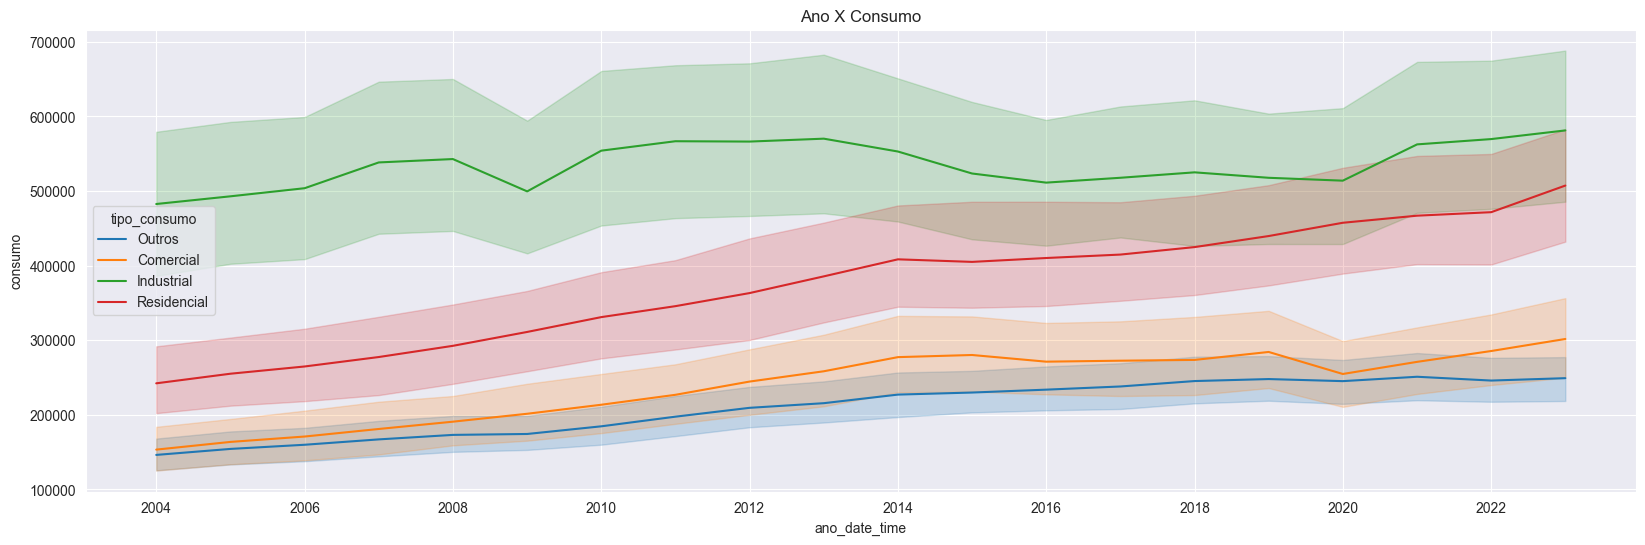

In [150]:
df_energy_insights['ano_date_time'] = pd.to_datetime(df_energy_insights['ano'],format= '%Y')
plt.figure(figsize=(20,6))
plt.title('Ano X Consumo')
sns.lineplot(data=df_energy_insights, x='ano_date_time', y='consumo', hue='tipo_consumo')

O gráfico acima permite a visualização da linha de tempo X consumo por categoria de cliente apontada na base de dados utilizada para este estudo. Podemos visualizar o crescimento ao longo dos anos para a categoria de consumidores classificados como 'Residencial' enquanto a categoria 'Industrial' apresenta oscilação em seu consumo na mesma janela de observação.

10. Calcule a média de consumo agrupados por ano e região e em seguida responda: Em qual ano o consumo de energia elétrica da região Nordeste foi mais alto que o Centro Oeste? 

In [151]:
reg_ano_cons = df_energy_insights.groupby(['regiao', 'ano'])['consumo'].mean().reset_index()
print(reg_ano_cons)

          regiao   ano       consumo
0   Centro-Oeste  2004 100102.505208
1   Centro-Oeste  2005 105432.052083
2   Centro-Oeste  2006 107769.401042
3   Centro-Oeste  2007 114746.552083
4   Centro-Oeste  2008 123189.578125
..           ...   ...           ...
95           Sul  2019 620978.277778
96           Sul  2020 615992.736111
97           Sul  2021 644170.312500
98           Sul  2022 657523.180556
99           Sul  2023 679563.777778

[100 rows x 3 columns]


In [152]:
filtro_Nordeste = (df_energy_insights['regiao']=='Nordeste')
df_filtro_Nordeste = df_energy_insights[filtro_Nordeste].groupby('ano')['consumo'].sum().reset_index().sort_values(by='consumo', ascending=False).head()
df_filtro_Nordeste.head()

,ano,consumo
19,2023,94838084.000000
18,2022,88191888.000000
17,2021,86917300.000000
15,2019,83138412.000000
16,2020,81169564.000000


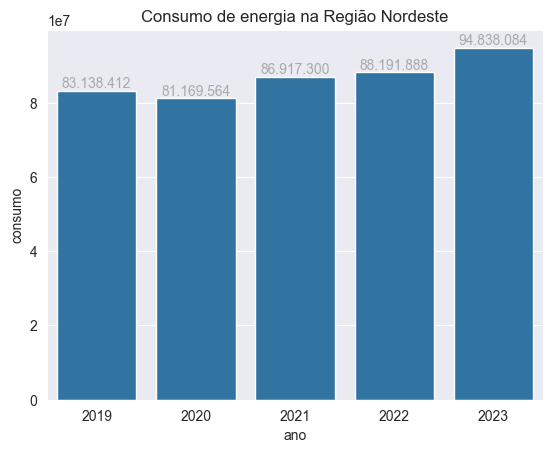

In [165]:
ax_10_n = sns.barplot(data=df_filtro_Nordeste, x='ano', y='consumo')
plt.title("Consumo de energia na Região Nordeste")
util.add_mark_to_bar(ax_10_n, '#AAA')

In [154]:
filtro_Centro_Oeste = (df_energy_insights['regiao']=='Centro-Oeste')
df_filtro_Centro_Oeste = df_energy_insights[filtro_Centro_Oeste].groupby('ano')['consumo'].sum().reset_index().sort_values(by='consumo', ascending=False).head()
df_filtro_Centro_Oeste.head()

,ano,consumo
19,2023,42656983.000000
18,2022,40556675.000000
17,2021,39842474.000000
16,2020,38944228.000000
15,2019,38418556.000000


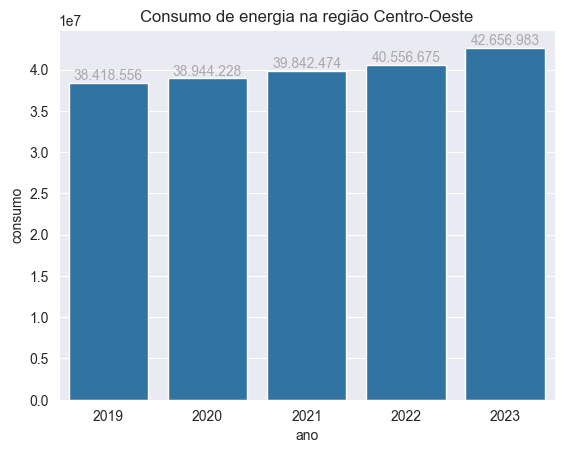

In [166]:
ax_10_co = sns.barplot(data=df_filtro_Centro_Oeste, x='ano', y='consumo')
plt.title("Consumo de energia na região Centro-Oeste")
util.add_mark_to_bar(ax_10_co, '#AAA')

Conforme análise dos dados, no ano de 2023, ambas as regiões 'Nordeste' e 'Centro-Oeste' tiveram seu maior consumo de energia elétrica dentro da base de dados estudada, porém, mesmo assim, pode-se observar que o consumo da região 'Nordeste' foi maior que a 'Centro-Oeste' .

# Novos insights

O gráfico abaixo compara o consumo de energia de São Paulo com o consumo total dos demais estados, evidenciando que São Paulo sozinho é responsável por quase 30% do consumo de energia no país

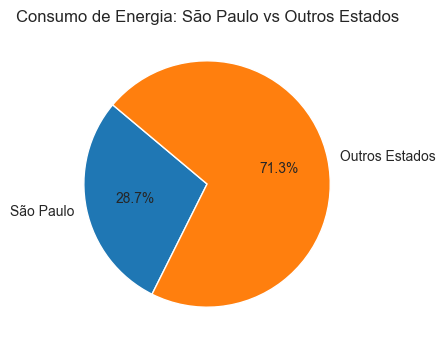

In [156]:
use_energy_sp = df_energy_insights[df_energy_insights['sigla'] == 'SP']['consumo'].sum()
use_energy_no_sp = df_energy_insights[df_energy_insights['sigla'] != 'SP']['consumo'].sum()
df_use_energy = [use_energy_sp, use_energy_no_sp]
labels_comparative = ['São Paulo', 'Outros Estados']
plt.figure(figsize=(4,4))
plt.pie(df_use_energy, labels=labels_comparative, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Consumo de Energia: São Paulo vs Outros Estados')

plt.show()

O gráfico abaixo, mostra o comparativo do consumo de energia ao longo dos anos entre São Paulo e os demais estados. 

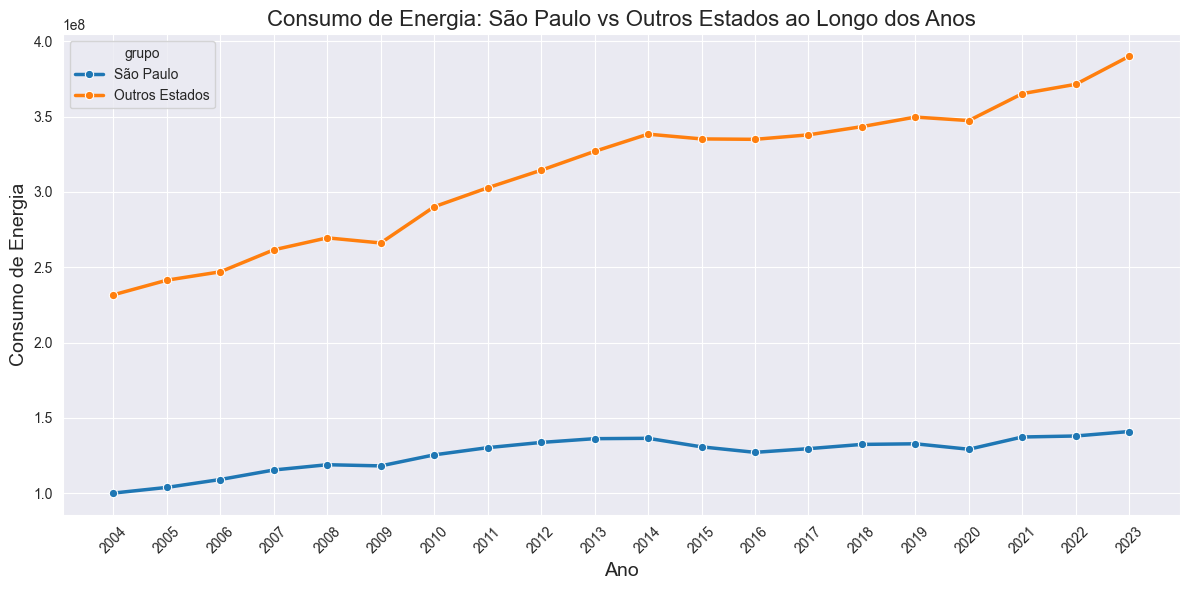

In [157]:
use_energy_sp = df_energy_insights[df_energy_insights['sigla'] == 'SP'].groupby('ano')['consumo'].sum().reset_index()
use_energy_no_sp = df_energy_insights[df_energy_insights['sigla'] != 'SP'].groupby('ano')['consumo'].sum().reset_index()
use_energy_no_sp['grupo'] = 'Outros Estados'
use_energy_sp['grupo'] = 'São Paulo'
df_use_energy = pd.concat([use_energy_sp, use_energy_no_sp])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_use_energy, x='ano', y='consumo', hue='grupo', marker='o', linewidth=2.5)
plt.xticks(ticks=energy_by_year['ano'], rotation=45)

plt.title('Consumo de Energia: São Paulo vs Outros Estados ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Consumo de Energia', fontsize=14)

plt.tight_layout()
plt.show()

É possível observar que o consumo dos outros estados aumentou significativamente com o passar dos anos, enquanto o consumo de São Paulo permaneceu relativamente estável.

4.1 - Criação de um gráfico de dispersão, demostrando crescimento ou redução da soma do consumo ao longo dos anos, agrupado por região:

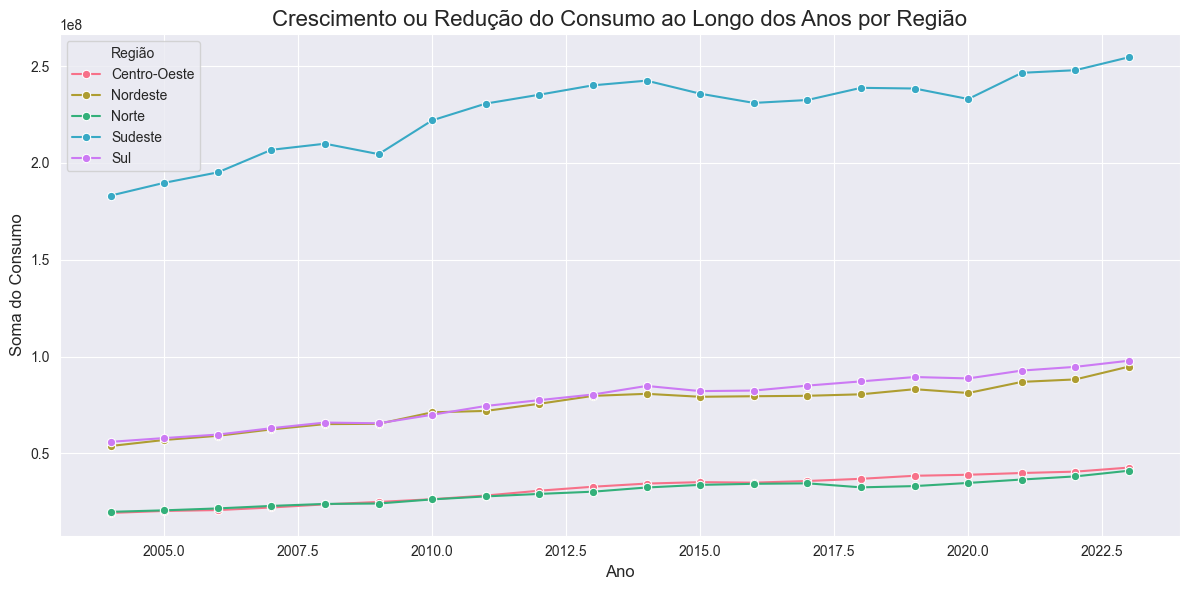

In [158]:
df_grouped_region = (df_energy_insights.groupby(['ano', 'regiao'])['consumo'].sum().reset_index())

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_region, x='ano', y='consumo', hue='regiao', palette='husl', marker='o')

plt.title('Crescimento ou Redução do Consumo ao Longo dos Anos por Região', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Soma do Consumo', fontsize=12)
plt.legend(title='Região')
plt.tight_layout()

plt.show()